## Importing required libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
#  plot some images to see what they are

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

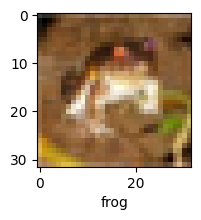

In [12]:
plot_sample(X_train, y_train, 0)

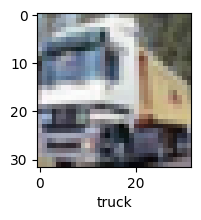

In [13]:
plot_sample(X_train, y_train, 1)

In [14]:
#Normalizing the  data

X_train = X_train / 255.0
X_test = X_test / 255.0

## Build a convolutional neural network to train our images

In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20


1563/1563 [==============================] - 17s 10ms/step - loss: 1.4628 - accuracy: 0.4743
Epoch 2/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1130 - accuracy: 0.6104
Epoch 3/20
1563/1563 [==============================] - 18s 11ms/step - loss: 0.9801 - accuracy: 0.6597
Epoch 4/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8916 - accuracy: 0.6910
Epoch 5/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8206 - accuracy: 0.7164
Epoch 6/20
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7667 - accuracy: 0.7328
Epoch 7/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7134 - accuracy: 0.7536
Epoch 8/20
1563/1563 [==============================] - 18s 11ms/step - loss: 0.6676 - accuracy: 0.7676
Epoch 9/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6236 - accuracy: 0.7852
Epoch 10/20
1563/1563 [==============================] - 19s 1

In [18]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.3717 - accuracy: 0.6724


[1.3716561794281006, 0.6723999977111816]

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:10]

313/313 [==============================] - 2s 4ms/step


array([[1.1807717e-03, 1.7852199e-06, 5.5372147e-03, 9.5832193e-01,
        3.4959307e-06, 3.3200059e-02, 5.9896411e-04, 2.1282090e-06,
        1.1532821e-03, 3.2713865e-07],
       [3.5358819e-06, 1.6758302e-05, 4.5914023e-12, 1.4331365e-16,
        3.2593269e-16, 2.6388627e-21, 1.1401614e-17, 7.1629721e-21,
        9.9997962e-01, 4.1301698e-11],
       [1.4870663e-02, 6.6012979e-02, 2.9214929e-05, 4.1529122e-05,
        7.2003626e-05, 1.8404822e-06, 3.1585614e-09, 3.0449899e-05,
        4.4022876e-01, 4.7871265e-01],
       [7.8012472e-01, 4.6357793e-05, 2.0877418e-01, 4.6635512e-05,
        1.7512033e-05, 5.0152926e-09, 1.1340727e-06, 8.9546961e-07,
        1.0988497e-02, 8.9642738e-09],
       [3.2007685e-11, 6.6622562e-04, 5.9571243e-03, 1.0467172e-02,
        8.7889344e-01, 7.5178737e-05, 1.0393557e-01, 2.1164681e-06,
        1.0174681e-06, 2.1867947e-06],
       [6.0849750e-08, 2.9883977e-06, 1.7645434e-02, 1.0845149e-03,
        4.3496815e-03, 1.0180554e-02, 9.6543479e-01, 1.29

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 9, 0, 4]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

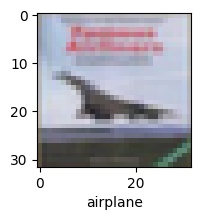

In [22]:
plot_sample(X_test, y_test,3)

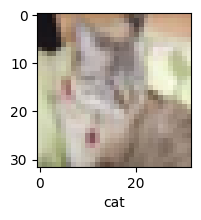

In [23]:
plot_sample(X_test, y_test,8)

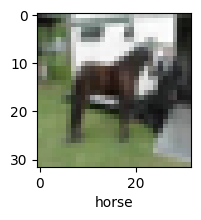

In [24]:
plot_sample(X_test, y_test,20)

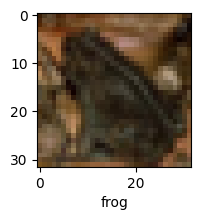

In [25]:
plot_sample(X_test, y_test,30)

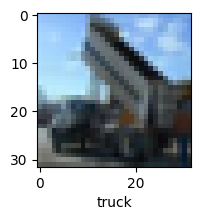

In [26]:
plot_sample(X_test, y_test,50)

# Conclusion